In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget

# Abbreviations
OMG — optomiography  
ACC — accelerometer  
GYR — gyroscope  
ENC - encoders (fingers of prosthesis or gloves)  
model — model of data  

# Data

## Free movments

In [2]:
free_movements = pd.read_csv('free_movements.csv', index_col=0)

print(free_movements.shape)
free_movements.head()

(20990, 65)


,0,1,2,3,4,5,6,7,8,9,...,GYR2,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts
140,1203,22,1594,123,10,2390,24,32,1848,40,...,-18,40,53,55,48,41,0,1000,0,8881644
141,1204,0,1598,136,2,2396,28,28,1847,42,...,-12,40,53,55,48,41,0,1000,0,8881677
142,1203,0,1599,132,14,2398,20,30,1851,45,...,-10,40,53,55,48,41,0,1000,0,8881710
143,1202,27,1601,115,11,2402,30,22,1858,44,...,-10,40,53,55,48,41,0,1000,0,8881743
144,1207,0,1601,109,4,2404,28,27,1857,43,...,-10,40,53,55,48,41,0,1000,0,8881776


In [3]:
# [X features] '0', ..., '49' - каналы OMG датчиков
#              'ACC0', 'ACC1', 'ACC2' - акселерометр (потенциально могут использоваться как факторы для модели)
#              'GYR0', 'GYR1', 'GYR2' - гироскоп     (потенциально могут использоваться как факторы для модели)
# [y target]   'ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5' - координаты пальцев в перчатке GLOVE
# 'BUTTON' - не используется
# 'SYNC' - синхронизация данных с протоколом (не используется для свободных движений)
# 'ts' - метка времени
free_movements.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0', 'ENC1',
       'ENC2', 'ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'],
      dtype='object')

In [3]:
OMG_CH = [str(i) for i in range(50)]

ACC_CH = ['ACC0', 'ACC1', 'ACC2']
GYR_CH = ['GYR0', 'GYR1', 'GYR2']
# ENC_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
GLOVE_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH = ['BUTTON', 'SYNC', 'ts']

assert len(OMG_CH)+len(ACC_CH)+len(GYR_CH)+len(GLOVE_CH)+len(BUTTON_SYNC_TS_CH) == free_movements.shape[-1]

print(f"OMG_CH: {list(OMG_CH)}")
print(f"ACC_CH: {list(ACC_CH)}")
print(f"GYR_CH: {list(GYR_CH)}")
print(f"GLOVE_CH: {list(GLOVE_CH)}")
print(f"BUTTON_SYNC_TS_CH: {list(BUTTON_SYNC_TS_CH)}")

OMG_CH: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']
ACC_CH: ['ACC0', 'ACC1', 'ACC2']
GYR_CH: ['GYR0', 'GYR1', 'GYR2']
GLOVE_CH: ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH: ['BUTTON', 'SYNC', 'ts']


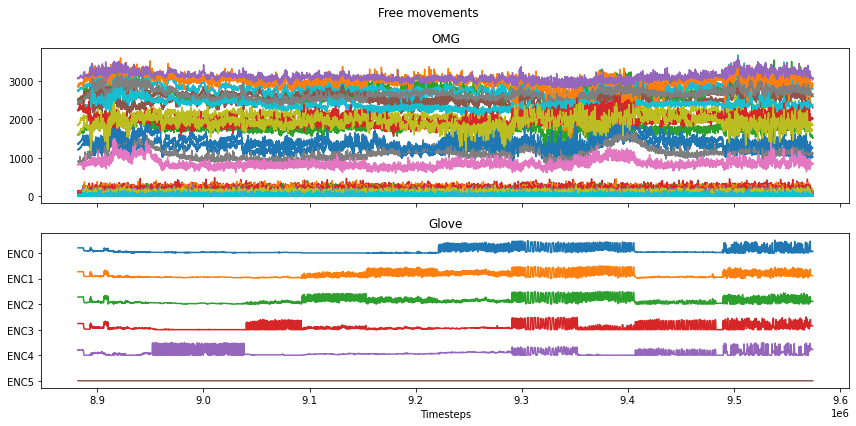

In [4]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plt.sca(axx[0])
plt.plot(free_movements['ts'].values, free_movements[OMG_CH].values)
plt.title('OMG')

plt.sca(axx[1])
plt.plot(free_movements['ts'].values, free_movements[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 200)
plt.yticks(-np.arange(len(GLOVE_CH)) * 200, GLOVE_CH)
plt.title('Glove')
plt.xlabel('Timesteps')

plt.suptitle('Free movements')
plt.tight_layout()

## Gestures

In [5]:
gestures_train = pd.read_csv('gestures_train.csv', index_col=0)

print(gestures_train.shape)
gestures_train.head()

(33172, 65)


,0,1,2,3,4,5,6,7,8,9,...,GYR2,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts
0,1605,0,1739,94,6,2618,30,29,2058,40,...,-1,19,25,22,11,0,0,1000,0,6492378
1,1604,8,1738,94,7,2618,30,28,2062,40,...,-14,19,25,21,11,0,0,1000,0,6492411
2,1607,9,1739,94,7,2624,32,28,2064,43,...,-17,19,25,21,11,0,0,1000,0,6492444
3,1597,2,1743,93,5,2612,31,31,2052,39,...,-15,19,25,21,11,0,0,1000,0,6492477
4,1595,7,1722,91,8,2603,32,26,2052,37,...,-10,19,25,21,11,0,0,1000,0,6492510


In [6]:
# [X features] '0', ..., '49' - каналы OMG датчиков
#              'ACC0', 'ACC1', 'ACC2' - акселерометр (потенциально могут использоваться как факторы для модели)
#              'GYR0', 'GYR1', 'GYR2' - гироскоп     (потенциально могут использоваться как факторы для модели)
# [y target]   'ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5' - координаты пальцев в перчатке GLOVE
# 'BUTTON' - не используется
# 'SYNC' - синхронизация данных с протоколом
# 'ts' - метка времени
gestures_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0', 'ENC1',
       'ENC2', 'ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'],
      dtype='object')

In [7]:
gestures_test = pd.read_csv('gestures_test.csv', index_col=0)

print(gestures_test.shape)
gestures_test.head()

(8168, 65)


,0,1,2,3,4,5,6,7,8,9,...,GYR2,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts
33172,1469,11,1858,99,4,2552,29,39,2190,38,...,-3,9,12,4,1,0,0,1000,433,7587054
33173,1460,11,1857,99,6,2549,31,32,2190,41,...,-3,9,12,4,1,0,0,1000,433,7587087
33174,1471,9,1860,101,6,2554,29,35,2193,39,...,-6,10,12,4,1,0,0,1000,433,7587120
33175,1467,8,1856,98,0,2549,27,36,2190,40,...,-12,10,12,4,1,0,0,1000,433,7587153
33176,1471,6,1859,99,3,2554,28,36,2187,40,...,-19,10,12,4,1,0,0,1000,433,7587186


C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_18708\1047684762.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


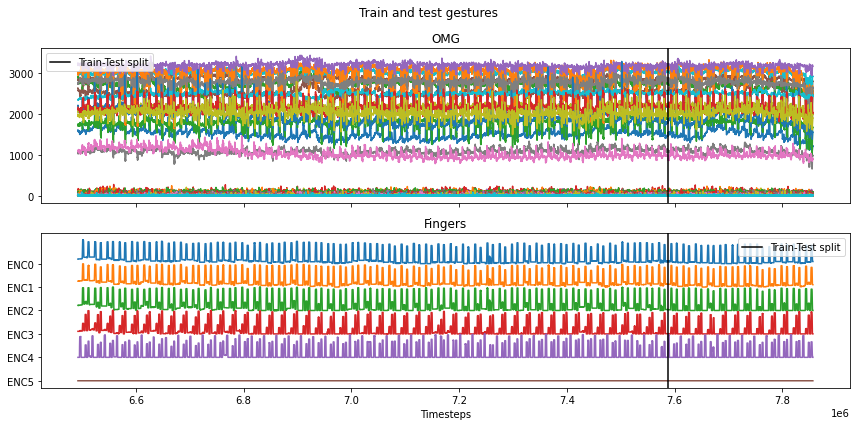

In [8]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plt.sca(axx[0])
plot_train = plt.plot(gestures_train['ts'].values, gestures_train[OMG_CH].values)
plot_test = plt.plot(gestures_test['ts'].values, gestures_test[OMG_CH].values)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train['ts'].values[-1], color='k', label='Train-Test split')
plt.title('OMG')
plt.legend()

plt.sca(axx[1])
plot_train = plt.plot(gestures_train['ts'].values, gestures_train[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 100)
plot_test = plt.plot(gestures_test['ts'].values, gestures_test[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 100)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train['ts'].values[-1], color='k', label='Train-Test split')
plt.yticks(-np.arange(len(GLOVE_CH)) * 100, GLOVE_CH)
plt.legend()
plt.title('Fingers')
plt.xlabel('Timesteps')

plt.suptitle('Train and test gestures')
plt.tight_layout()

### Protocol

In [9]:
gestures_protocol = pd.read_csv('gestures_protocol.csv')
gestures_protocol.head(10)


,epoch,Thumb,Index,Middle,Ring,Pinky,id
0,0,0,0,0,0,0,1
1,1,100,0,0,0,0,2
2,2,0,0,0,0,0,3
3,3,0,0,100,100,100,4
4,4,0,0,0,0,0,5
5,5,100,100,0,0,0,6
6,6,0,0,0,0,0,7
7,7,100,100,100,100,100,8
8,8,0,0,0,0,0,9
9,9,0,0,0,0,0,1


In [10]:
gestures_train_ext = pd.merge(
    gestures_train,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

gestures_test_ext = pd.merge(
    gestures_test,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

In [11]:
gestures_train_ext.isna().sum().unique(), gestures_test_ext.isna().sum().unique()

(array([0], dtype=int64), array([0], dtype=int64))

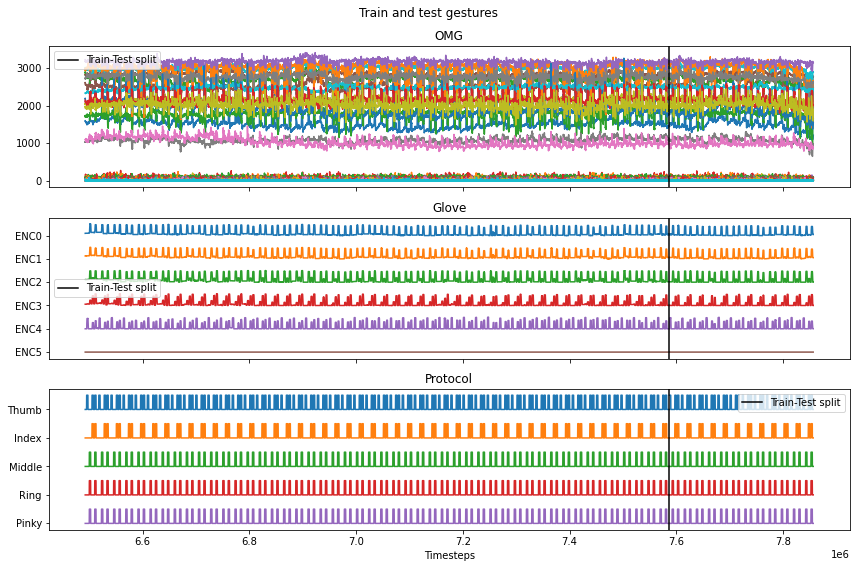

In [12]:
fig, axx = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
plt.sca(axx[0])
plot_train = plt.plot(gestures_train_ext['ts'].values, gestures_train_ext[OMG_CH].values)
plot_test = plt.plot(gestures_test_ext['ts'].values, gestures_test_ext[OMG_CH].values)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.title('OMG')

plt.sca(axx[1])
plot_train = plt.plot(gestures_train_ext['ts'].values, gestures_train_ext[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 200)
plot_test = plt.plot(gestures_test_ext['ts'].values, gestures_test_ext[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 200)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(GLOVE_CH)) * 200, GLOVE_CH)
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.title('Glove')

plt.sca(axx[2])

plot_train = plt.plot(
    gestures_train_ext['ts'].values,
    gestures_train_ext[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']].values - np.arange(5) * 200
)

plot_test = plt.plot(
    gestures_test_ext['ts'].values,
    gestures_test_ext[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']].values - np.arange(5) * 200
)

for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(5) * 200, ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky'])
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.xlabel('Timesteps')
plt.title('Protocol')

plt.suptitle('Train and test gestures')
plt.tight_layout()

# Preprocessing

# Modeling

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = gestures_train[OMG_CH].values
X_test = gestures_test[OMG_CH].values
y = gestures_train[GLOVE_CH].values
y_test = gestures_test[GLOVE_CH].values

model_dt = DecisionTreeRegressor(criterion='friedman_mse', random_state=32)
model_dt.fit(X, y)

model_lr = LinearRegression()
model_lr.fit(X, y)

model_rfr = RandomForestRegressor()
model_rfr.fit(X, y)

y_pred_train_dt = model_dt.predict(X)
y_pred_train_dt = pd.DataFrame(y_pred_train_dt, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_dt = model_dt.predict(X_test)
y_pred_test_dt = pd.DataFrame(y_pred_test_dt, columns=GLOVE_CH, index=gestures_test['ts'])

y_pred_train_lr = model_lr.predict(X)
y_pred_train_lr = pd.DataFrame(y_pred_train_lr, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_lr = model_lr.predict(X_test)
y_pred_test_lr = pd.DataFrame(y_pred_test_lr, columns=GLOVE_CH, index=gestures_test['ts'])

y_pred_train_rfr = model_rfr.predict(X)
y_pred_train_rfr = pd.DataFrame(y_pred_train_rfr, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_rfr = model_rfr.predict(X_test)
y_pred_test_rfr = pd.DataFrame(y_pred_test_rfr, columns=GLOVE_CH, index=gestures_test['ts'])


In [15]:
from sklearn.metrics import mean_squared_error as mse

metrics_train_dt = {col : mse(gestures_train[col], y_pred_train_dt[col]) for col in GLOVE_CH}
metrics_test_dt = {col : mse(gestures_test[col], y_pred_test_dt[col]) for col in GLOVE_CH}

metrics_train_dt = pd.Series(metrics_train_dt)
metrics_test_dt = pd.Series(metrics_test_dt)

metrics_train_lr = {col : mse(gestures_train[col], y_pred_train_lr[col]) for col in GLOVE_CH}
metrics_test_lr = {col : mse(gestures_test[col], y_pred_test_lr[col]) for col in GLOVE_CH}

metrics_train_lr = pd.Series(metrics_train_lr)
metrics_test_lr = pd.Series(metrics_test_lr)

metrics_train_rfr = {col : mse(gestures_train[col], y_pred_train_rfr[col]) for col in GLOVE_CH}
metrics_test_rfr = {col : mse(gestures_test[col], y_pred_test_rfr[col]) for col in GLOVE_CH}

metrics_train_rfr = pd.Series(metrics_train_rfr)
metrics_test_rfr = pd.Series(metrics_test_rfr)

report = pd.DataFrame({
    'DTR_train':metrics_train_dt,
    'LinR_train':metrics_train_lr, 
    'RFR_train':metrics_train_rfr,
    'DTR_test':metrics_test_dt,
    'LinR_test':metrics_test_lr,
    'RFR_test':metrics_test_rfr
    })

report

,DTR_train,LinR_train,RFR_train,DTR_test,LinR_test,RFR_test
ENC0,0.0,44.761241,1.081335,91.566724,57.252958,37.270509
ENC1,0.0,35.262227,0.900872,84.563296,37.579762,35.508552
ENC2,0.0,47.073603,1.056234,73.051298,48.509950,29.195883
ENC3,0.0,207.066172,3.888143,328.733227,263.154448,198.276361
ENC4,0.0,423.469831,5.863835,1118.211312,546.546481,383.726315
ENC5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


***
FE
***

In [16]:
col_to_drop = []

for col in gestures_train[OMG_CH].columns:
    if gestures_train[OMG_CH][col].mean() < 500:
        col_to_drop.append(col)

len(col_to_drop)

34

In [17]:
data_train = gestures_train.drop(col_to_drop, axis=1)
data_test= gestures_test.drop(col_to_drop, axis=1)
OMG_active = ['0', '2', '5', '8', '12', '15', '17', '19', '21', '24', '27', '29', '30', '33', '36', '38']

In [18]:
def average(array):
    window_size = 3
    i = 0
    moving_averages = []

    while i < len(array) - window_size + 1:
        window_average = round(np.sum(array[i:i+window_size]) / window_size, 2)
        moving_averages.append(window_average)
        i += 1
    moving_averages = np.array(moving_averages)
    fill = array[:window_size-1]
    result = np.insert(moving_averages, 0 , fill)
    return np.rint(result)

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = data_train[OMG_active].values
X_test = data_test[OMG_active].values
y = gestures_train[GLOVE_CH].values
y_test = gestures_test[GLOVE_CH].values

model_dt = DecisionTreeRegressor(criterion='friedman_mse', random_state=32)
model_dt.fit(X, y)

model_lr = LinearRegression()
model_lr.fit(X, y)

model_rfr = RandomForestRegressor(random_state=32)
model_rfr.fit(X, y)

y_pred_train_dt = model_dt.predict(X)
y_pred_train_dt_up = np.zeros_like(y_pred_train_dt)
for i in np.arange(6):
    y_pred_train_dt_up[:,i] = average(y_pred_train_dt[:,i])
y_pred_train_dt_up = pd.DataFrame(y_pred_train_dt_up, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_dt = model_dt.predict(X_test)
y_pred_test_dt_up = np.zeros_like(y_pred_test_dt)
for i in np.arange(6):
    y_pred_test_dt_up[:,i] = average(y_pred_test_dt[:,i])
y_pred_test_dt_up = pd.DataFrame(y_pred_test_dt_up, columns=GLOVE_CH, index=gestures_test['ts'])

y_pred_train_lr = model_lr.predict(X)
y_pred_train_lr_up = np.zeros_like(y_pred_train_lr)
for i in np.arange(6):
    y_pred_train_lr_up[:,i] = average(y_pred_train_lr[:,i])
y_pred_train_lr_up = pd.DataFrame(y_pred_train_lr_up, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_lr = model_lr.predict(X_test)
y_pred_test_lr_up = np.zeros_like(y_pred_test_lr)
for i in np.arange(6):
    y_pred_test_lr_up[:,i] = average(y_pred_test_lr[:,i])
y_pred_test_lr_up = pd.DataFrame(y_pred_test_lr_up, columns=GLOVE_CH, index=gestures_test['ts'])

y_pred_train_rfr = model_rfr.predict(X)
y_pred_train_rfr_up = np.zeros_like(y_pred_train_rfr)
for i in np.arange(6):
    y_pred_train_rfr_up[:,i] = average(y_pred_train_rfr[:,i])
y_pred_train_rfr_up = pd.DataFrame(y_pred_train_rfr_up, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_rfr = model_rfr.predict(X_test)
y_pred_test_rfr_up = np.zeros_like(y_pred_test_rfr)
for i in np.arange(6):
    y_pred_test_rfr_up[:,i] = average(y_pred_test_rfr[:,i])
y_pred_test_rfr_up = pd.DataFrame(y_pred_test_rfr_up, columns=GLOVE_CH, index=gestures_test['ts'])


In [22]:
from sklearn.metrics import mean_squared_error as mse

metrics_train_dt = {col : mse(gestures_train[col], y_pred_train_dt_up[col]) for col in GLOVE_CH}
metrics_test_dt = {col : mse(gestures_test[col], y_pred_test_dt_up[col]) for col in GLOVE_CH}

metrics_train_dt = pd.Series(metrics_train_dt)
metrics_test_dt = pd.Series(metrics_test_dt)

metrics_train_lr = {col : mse(gestures_train[col], y_pred_train_lr_up[col]) for col in GLOVE_CH}
metrics_test_lr = {col : mse(gestures_test[col], y_pred_test_lr_up[col]) for col in GLOVE_CH}

metrics_train_lr = pd.Series(metrics_train_lr)
metrics_test_lr = pd.Series(metrics_test_lr)

metrics_train_rfr = {col : mse(gestures_train[col], y_pred_train_rfr_up[col]) for col in GLOVE_CH}
metrics_test_rfr = {col : mse(gestures_test[col], y_pred_test_rfr_up[col]) for col in GLOVE_CH}

metrics_train_rfr = pd.Series(metrics_train_rfr)
metrics_test_rfr = pd.Series(metrics_test_rfr)

report_active_OMG = pd.DataFrame({
    'DTR_train_AOMG':metrics_train_dt,
    'LinR_train_AOMG':metrics_train_lr, 
    'RFR_train_AOMG':metrics_train_rfr,
    'DTR_test_AOMG':metrics_test_dt,
    'LinR_test_AOMG':metrics_test_lr,
    'RFR_test_AOMG':metrics_test_rfr
    })

report_active_OMG

,DTR_train_AOMG,LinR_train_AOMG,RFR_train_AOMG,DTR_test_AOMG,LinR_test_AOMG,RFR_test_AOMG
ENC0,2.363409,52.096286,2.661371,69.277547,60.083619,28.950171
ENC1,2.122151,45.636320,2.406457,65.153404,50.464006,30.215108
ENC2,2.859822,64.839775,3.368745,72.236410,73.654750,38.028404
ENC3,3.088297,225.119137,4.740112,391.899608,326.451641,292.220984
ENC4,4.683739,454.022157,8.057729,916.227106,641.620960,388.268732
ENC5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Попробуем препроцессинг из коробки sklearn

In [45]:
def MSE(y, y_pred):
    ENC0 = mse(y[:,0], y_pred[:,0])
    ENC1 = mse(y[:,1], y_pred[:,1])
    ENC2 = mse(y[:,2], y_pred[:,2])
    ENC3 = mse(y[:,3], y_pred[:,3])
    ENC4 = mse(y[:,4], y_pred[:,4])
    ENC5 = mse(y[:,5], y_pred[:,5])
    return pd.Series([ENC0, ENC1, ENC2, ENC3, ENC4, ENC5])

In [69]:
from sklearn.ensemble import RandomForestRegressor

X = data_train[OMG_active].values
X_test = data_test[OMG_active].values
y = gestures_train[GLOVE_CH].values
y_test = gestures_test[GLOVE_CH].values

RFR = RandomForestRegressor(random_state=32).fit(X, y)

y_pred = RFR.predict(X)
y_test_pred = RFR.predict(X_test)

print(pd.DataFrame({'train':MSE(y, y_pred), 'test':MSE(y_test, y_test_pred)}))

      train        test
0  0.861051   30.379402
1  0.724724   30.882408
2  0.859303   38.412970
3  2.747651  297.872059
4  3.801190  393.750320
5  0.000000    0.000000


In [70]:
from sklearn.ensemble import RandomForestRegressor

X = gestures_train[OMG_CH].values
X_test = gestures_test[OMG_CH].values
y = gestures_train[GLOVE_CH].values
y_test = gestures_test[GLOVE_CH].values

RFR = RandomForestRegressor(random_state=32).fit(X, y)

y_pred = RFR.predict(X)
y_test_pred = RFR.predict(X_test)

print(pd.DataFrame({'train':MSE(y, y_pred), 'test':MSE(y_test, y_test_pred)}))

      train        test
0  1.108492   36.746629
1  0.925809   35.379470
2  1.058566   28.481814
3  3.956215  199.747462
4  5.797001  387.436319
5  0.000000    0.000000


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.multioutput import MultiOutputRegressor

X = data_train[OMG_active].values
X_test = data_test[OMG_active].values
y = gestures_train[GLOVE_CH].values
y_test = gestures_test[GLOVE_CH].values

RFR = RandomForestRegressor(random_state=32)
DTR = DecisionTreeRegressor(random_state=32)
LR = LinearRegression()

VR = MultiOutputRegressor(VotingRegressor(estimators=[('RFR', RFR), ('DTR', DTR), ('LR', LR)]))
VR.fit(X, y)

y_pred_vr = VR.predict(X)
y_test_pred_vr = VR.predict(X_test)

print(pd.DataFrame({'train':MSE(y, y_pred_vr), 'test':MSE(y_test, y_test_pred_vr)}))

       train        test
0   6.219748   27.004696
1   5.425156   27.692238
2   7.660003   46.750955
3  28.055375  305.789461
4  54.680311  418.554451
5   0.000000    0.000000


ValueError: X has 16 features, but RandomForestRegressor is expecting 50 features as input.

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = data_train[OMG_active].values
X_test = data_test[OMG_active].values
y = gestures_train[GLOVE_CH].values
y_test = gestures_test[GLOVE_CH].values

RFR = RandomForestRegressor(random_state=32).fit(X, y)
LR = LinearRegression().fit(X, y)

y_pred_rfr = RFR.predict(X)
y_test_pred_rfr = RFR.predict(X_test)

y_pred_lr = LR.predict(X)
y_test_pred_lr = LR.predict(X_test)

y_pred = np.mean([y_pred_rfr, y_pred_lr], axis=0)
y_pred_test = np.mean([y_test_pred_rfr, y_test_pred_lr], axis=0)

print(pd.DataFrame({'train':MSE(y, y_pred), 'test':MSE(y_test, y_test_pred)}))

        train        test
0   14.173185   36.746629
1   12.378257   35.379470
2   17.313171   28.481814
3   63.197452  199.747462
4  122.187795  387.436319
5    0.000000    0.000000


In [83]:
y_pred_rfr = RFR.predict(X)
y_test_pred_rfr = RFR.predict(X_test)

y_pred_lr = LR.predict(X)
y_test_pred_lr = LR.predict(X_test)

y_pred = np.mean([y_pred_rfr, y_pred_lr], axis=0)
y_pred_test = np.mean([y_test_pred_rfr, y_test_pred_lr], axis=0)

print(pd.DataFrame({'train':MSE(y, y_pred), 'test':MSE(y_test, y_test_pred)}))

        train        test
0   14.173185   36.746629
1   12.378257   35.379470
2   17.313171   28.481814
3   63.197452  199.747462
4  122.187795  387.436319
5    0.000000    0.000000


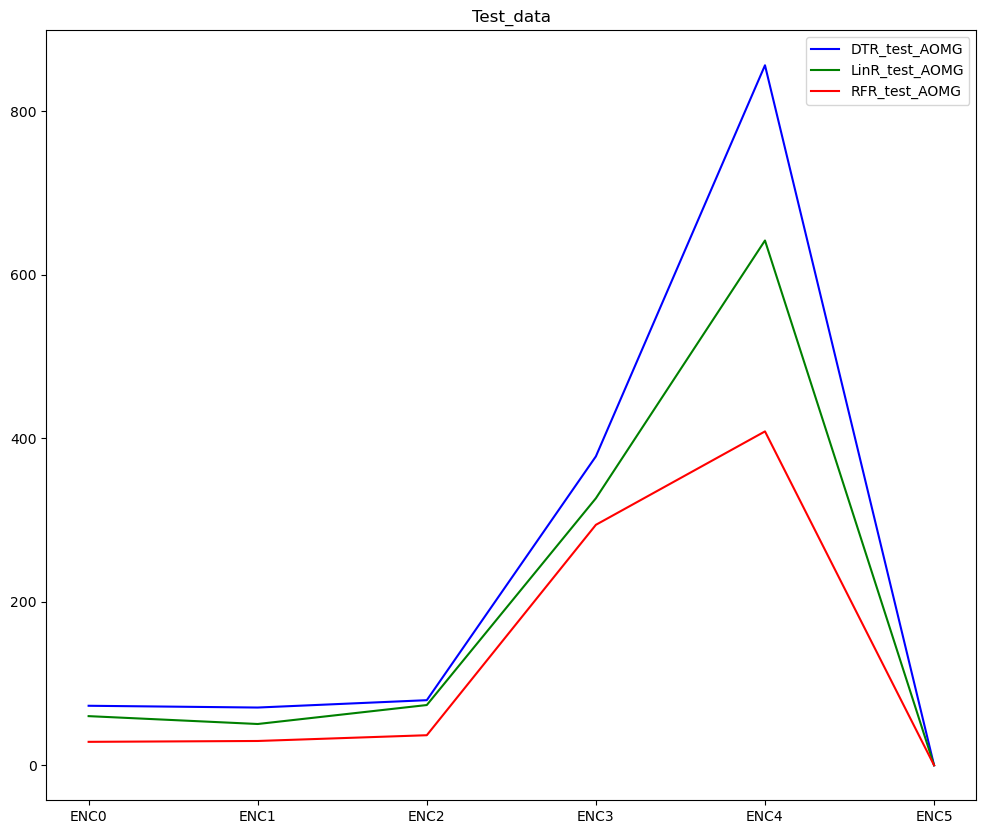

In [218]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(report_active_OMG[['DTR_test_AOMG']], color='blue', label='DTR_test_AOMG')
ax.plot(report_active_OMG[['LinR_test_AOMG']], color='green', label='LinR_test_AOMG')
ax.plot(report_active_OMG[['RFR_test_AOMG']], color='red', label='RFR_test_AOMG')
ax.set_title('Test_data')
ax.legend()

In [230]:
y_pred_test_rfr_up.columns

Index(['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5'], dtype='object')

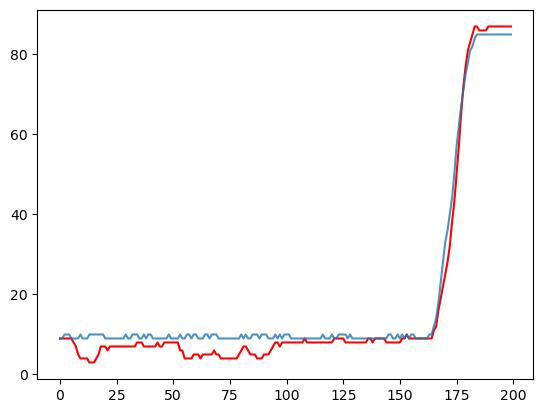

In [246]:
plt.plot(y_pred_test_rfr_up['ENC0'][0:200].values, color='red')
plt.plot(y_test[:,0][0:200], alpha=0.8)

***
stop
***

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = data_train[OMG_active].values
X_test = gestures_test[OMG_active].values
y = gestures_train[GLOVE_CH].values
y_test = gestures_test[GLOVE_CH].values

model_dt = DecisionTreeRegressor(criterion='friedman_mse', random_state=13)
model_dt.fit(X, y)

model_lr = LinearRegression()
model_lr.fit(X, y)

model_rfr = RandomForestRegressor()
model_rfr.fit(X, y)

y_pred_train_dt = model_dt.predict(X)
y_pred_train_dt = pd.DataFrame(y_pred_train_dt, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_dt = model_dt.predict(X_test)
y_pred_test_dt = pd.DataFrame(y_pred_test_dt, columns=GLOVE_CH, index=gestures_test['ts'])

y_pred_train_lr = model_lr.predict(X)
y_pred_train_lr = pd.DataFrame(y_pred_train_lr, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_lr = model_lr.predict(X_test)
y_pred_test_lr = pd.DataFrame(y_pred_test_lr, columns=GLOVE_CH, index=gestures_test['ts'])

y_pred_train_rfr = model_rfr.predict(X)
y_pred_train_rfr = pd.DataFrame(y_pred_train_rfr, columns=GLOVE_CH, index=gestures_train['ts'])

y_pred_test_rfr = model_rfr.predict(X_test)
y_pred_test_rfr = pd.DataFrame(y_pred_test_rfr, columns=GLOVE_CH, index=gestures_test['ts'])

In [25]:
from sklearn.metrics import mean_squared_error as mse

metrics_train_dt = {col : mse(gestures_train[col], y_pred_train_dt[col]) for col in GLOVE_CH}
metrics_test_dt = {col : mse(gestures_test[col], y_pred_test_dt[col]) for col in GLOVE_CH}

metrics_train_dt = pd.Series(metrics_train_dt)
metrics_test_dt = pd.Series(metrics_test_dt)

metrics_train_lr = {col : mse(gestures_train[col], y_pred_train_lr[col]) for col in GLOVE_CH}
metrics_test_lr = {col : mse(gestures_test[col], y_pred_test_lr[col]) for col in GLOVE_CH}

metrics_train_lr = pd.Series(metrics_train_lr)
metrics_test_lr = pd.Series(metrics_test_lr)

metrics_train_rfr = {col : mse(gestures_train[col], y_pred_train_rfr[col]) for col in GLOVE_CH}
metrics_test_rfr = {col : mse(gestures_test[col], y_pred_test_rfr[col]) for col in GLOVE_CH}

metrics_train_rfr = pd.Series(metrics_train_rfr)
metrics_test_rfr = pd.Series(metrics_test_rfr)

report_active_OMG = pd.DataFrame({
    'DTR_train_AOMG':metrics_train_dt,
    'LinR_train_AOMG':metrics_train_lr, 
    'RFR_train_AOMG':metrics_train_rfr,
    'DTR_test_AOMG':metrics_test_dt,
    'LinR_test_AOMG':metrics_test_lr,
    'RFR_test_AOMG':metrics_test_rfr
    })

report_all = report.join(report_active_OMG)
report_all

,DTR_train_AOMG,LinR_train_AOMG,RFR_train_AOMG,DTR_test_AOMG,LinR_test_AOMG,RFR_test_AOMG
ENC0,0.0,51.792287,0.849121,85.332762,60.032683,30.138994
ENC1,0.0,45.136587,0.718830,81.954334,49.660282,30.561198
ENC2,0.0,63.267043,0.863072,91.435235,71.728160,38.952076
ENC3,0.0,232.605529,2.751337,416.152057,330.842742,303.867181
ENC4,0.0,459.221702,3.749343,953.882713,645.347378,405.667746
ENC5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


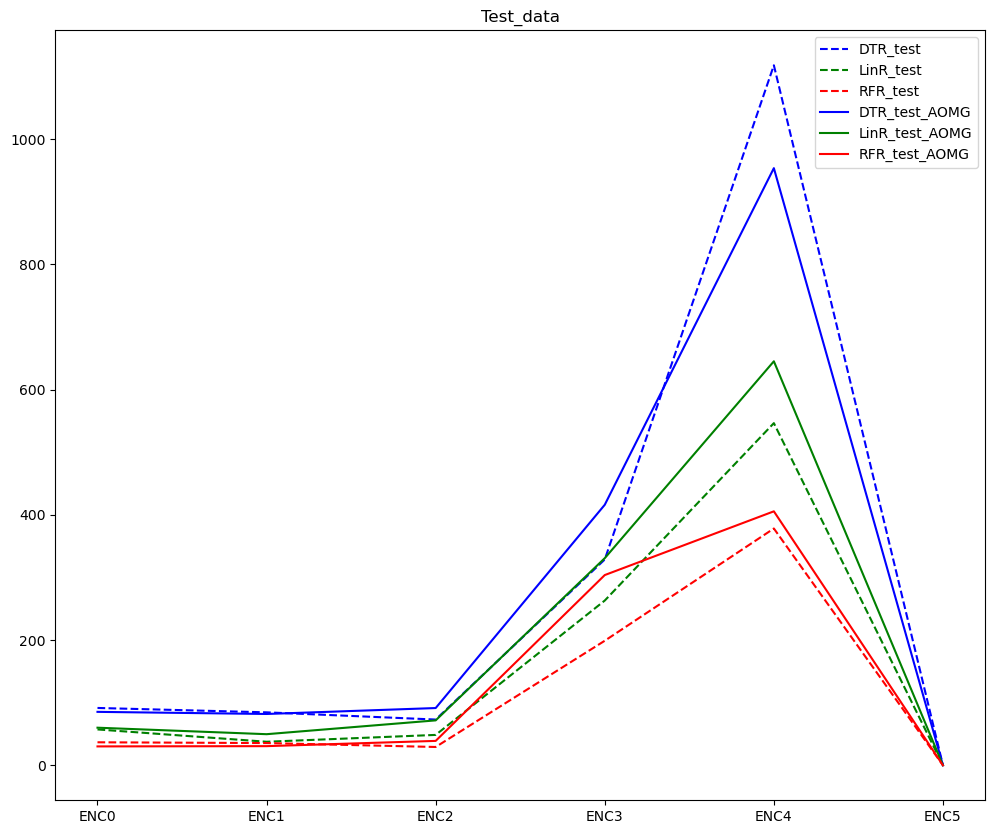

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(report_all[['DTR_test']], color='blue', label='DTR_test', linestyle='--')
ax.plot(report_all[['LinR_test']], color='green', label='LinR_test', linestyle='--')
ax.plot(report_all[['RFR_test']], color='red', label='RFR_test', linestyle='--')
ax.plot(report_all[['DTR_test_AOMG']], color='blue', label='DTR_test_AOMG')
ax.plot(report_all[['LinR_test_AOMG']], color='green', label='LinR_test_AOMG')
ax.plot(report_all[['RFR_test_AOMG']], color='red', label='RFR_test_AOMG')
ax.set_title('Test_data')
ax.legend()


In [52]:
y_test[:,0][0:100]

array([ 9,  9, 10, 10, 10,  9,  9,  9,  9, 10,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,  9,  9, 10, 10,
       10,  9,  9, 10,  9, 10, 10,  9,  9,  9,  9,  9,  9,  9, 10,  9,  9,
        9,  9, 10,  9,  9, 10, 10,  9, 10, 10,  9,  9,  9, 10, 10,  9, 10,
       10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,  9, 10,  9,  9,
       10, 10, 10,  9, 10, 10, 10,  9,  9,  9, 10,  9, 10,  9, 10])

In [54]:
y_pred_test_rfr['ENC0'][0:100].values

array([9.25, 9.35, 9.27, 9.45, 9.38, 8.9 , 7.48, 5.24, 5.2 , 4.84, 5.34,
       4.13, 4.42, 3.86, 3.53, 3.85, 5.24, 7.92, 8.54, 6.07, 6.54, 7.15,
       6.17, 6.18, 6.18, 6.38, 6.32, 6.49, 6.62, 6.03, 6.7 , 7.23, 7.09,
       7.16, 7.29, 7.85, 6.94, 6.32, 6.9 , 6.98, 6.23, 7.27, 7.1 , 7.04,
       6.19, 7.01, 7.97, 7.9 , 8.44, 7.69, 7.88, 6.65, 7.49, 4.1 , 5.75,
       3.83, 4.43, 4.02, 3.9 , 7.66, 3.85, 4.31, 5.1 , 4.64, 4.58, 4.59,
       5.83, 5.55, 5.65, 4.67, 4.35, 4.19, 3.92, 3.88, 3.87, 4.79, 3.88,
       4.88, 5.17, 5.71, 7.3 , 6.7 , 6.17, 4.87, 5.38, 4.6 , 5.31, 4.75,
       4.99, 4.75, 5.5 , 5.72, 6.39, 7.4 , 8.47, 7.1 , 7.35, 7.5 , 7.54,
       8.62])

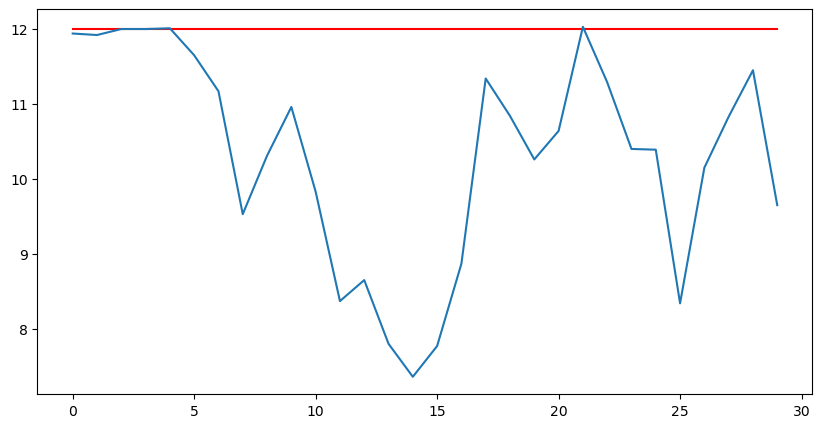

In [57]:
fig = plt.figure(figsize=(10, 5))

plt.plot(y_test[:,1][0:30], color='red')
plt.plot(y_pred_test_rfr['ENC1'][0:30].values)

In [235]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(copy_X=False)

pred_train = pd.DataFrame(index=np.arange(y.shape[0]))
pred_test = pd.DataFrame(index=np.arange(y_test.shape[0]))

for i in np.arange(6):
    LR.fit(X, y[:,i])
    pred_train[GLOVE_CH[i]] = LR.predict(X)
    pred_test[GLOVE_CH[i]] = LR.predict(X_test)
    
metrics_train_LR = {col : mse(gestures_train[col], pred_train[col]) for col in GLOVE_CH}
metrics_test_LR = {col : mse(gestures_test[col], pred_test[col]) for col in GLOVE_CH}

metrics_train_LR = pd.Series(metrics_train_LR)
metrics_test_LR = pd.Series(metrics_test_LR)

report_dropped['LR_train'] = metrics_train_LR
report_dropped['LR_test'] = metrics_test_LR

report_dropped

,DTR_train,DTR_test,LinR_train,LinR_test,RFR_train,RFR_test,LR_train,LR_test
ENC0,0.0,62.144833,51.792287,60.032683,1.044980,36.492785,51.792287,60.032683
ENC1,0.0,70.989104,45.136587,49.660282,0.872305,34.551464,45.136587,49.660282
ENC2,0.0,88.341454,63.267043,71.728160,1.008328,28.753718,63.267043,71.728160
ENC3,0.0,460.389691,232.605529,330.842742,3.862258,201.591588,232.605529,330.842742
ENC4,0.0,756.767018,459.221702,645.347378,5.714653,386.390254,459.221702,645.347378
ENC5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [297]:
import lightgbm as lgb

pred_train = pd.DataFrame(index=np.arange(y.shape[0]))
pred_test = pd.DataFrame(index=np.arange(y_test.shape[0]))

for i in np.arange(6):
    train_dataset = lgb.Dataset(X, y[:,i])
    test_dataset = lgb.Dataset(X_test, y_test[:,i])

    booster = lgb.train({"objective": "mse", 'learning_rate':0.07},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=60)
    
    pred_train[GLOVE_CH[i]] = np.rint(booster.predict(X))
    pred_test[GLOVE_CH[i]] = np.rint(booster.predict(X_test))
    
metrics_train_LR = {col : mse(gestures_train[col], pred_train[col]) for col in GLOVE_CH}
metrics_test_LR = {col : mse(gestures_test[col], pred_test[col]) for col in GLOVE_CH}

metrics_train_LR = pd.Series(metrics_train_LR)
metrics_test_LR = pd.Series(metrics_test_LR)

report_dropped['LR_train'] = metrics_train_LR
report_dropped['LR_test'] = metrics_test_LR

report_dropped

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 33172, number of used features: 16
[LightGBM] [Info] Start training from score 24.541782
[1]	valid_0's l2: 769.201
[2]	valid_0's l2: 666.742
[3]	valid_0's l2: 575.611
[4]	valid_0's l2: 499.488
[5]	valid_0's l2: 435.949
[6]	valid_0's l2: 377.805
[7]	valid_0's l2: 327.558
[8]	valid_0's l2: 283.471
[9]	valid_0's l2: 246.39
[10]	valid_0's l2: 214.176
[11]	valid_0's l2: 187.075
[12]	valid_0's l2: 164.917
[13]	valid_0's l2: 144.273
[14]	valid_0's l2: 126.626
[15]	valid_0's l2: 111.332
[16]	valid_0's l2: 98.9537
[17]	valid_0's l2: 87.7881
[18]	valid_0's l2: 77.903
[19]	valid_0's l2: 69.6114
[20]	valid_0's l2: 62.9413
[21]	valid_0's l2: 56.8606
[22]	valid_0's l2: 52.1528
[23]	va

,DTR_train,DTR_test,LinR_train,LinR_test,RFR_train,RFR_test,LR_train,LR_test
ENC0,0.0,62.144833,51.792287,60.032683,1.044980,36.492785,9.880984,26.327865
ENC1,0.0,70.989104,45.136587,49.660282,0.872305,34.551464,9.542867,28.668830
ENC2,0.0,88.341454,63.267043,71.728160,1.008328,28.753718,12.837122,44.042360
ENC3,0.0,460.389691,232.605529,330.842742,3.862258,201.591588,40.369046,307.323825
ENC4,0.0,756.767018,459.221702,645.347378,5.714653,386.390254,66.805499,343.289545
ENC5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [301]:
pred_train

,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5
0,33.0,32.0,27.0,9.0,2.0,0.0
1,33.0,32.0,27.0,8.0,2.0,0.0
2,31.0,31.0,28.0,9.0,2.0,0.0
3,31.0,32.0,27.0,10.0,2.0,0.0
4,28.0,32.0,27.0,10.0,2.0,0.0
...,...,...,...,...,...,...
33167,7.0,11.0,4.0,1.0,1.0,0.0
33168,9.0,12.0,4.0,1.0,1.0,0.0
33169,10.0,12.0,4.0,1.0,1.0,0.0
33170,9.0,11.0,4.0,1.0,1.0,0.0


In [322]:
y_test.shape

(8168, 6)

In [325]:
pred_test['ENC0'][0:100]

0     10.0
1      8.0
2      9.0
3      9.0
4      8.0
      ... 
95     8.0
96     9.0
97     8.0
98    12.0
99     9.0
Name: ENC0, Length: 100, dtype: float64

NameError: name 'pred_test' is not defined

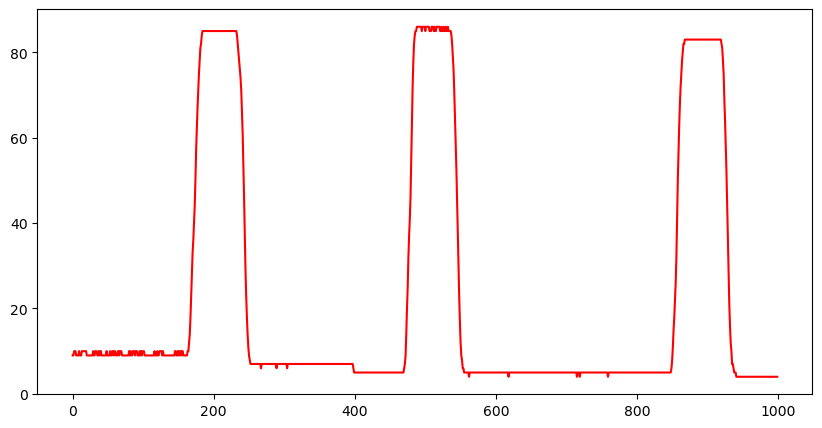

In [35]:
fig = plt.figure(figsize=(10, 5))

lines = []
labels = []

plt.plot(y_test[:,0][0:1000], color='red')
plt.plot(pred_test['ENC0'][0:1000])


# stop

# stop

# stop

# stop

# Real-time inference

In [19]:
import time
import serial
from IPython.display import clear_output

ModuleNotFoundError: No module named 'serial'

In [20]:
crc_table = [
    54, 181, 83, 241, 89, 16, 164, 217, 34, 169, 220, 160, 11, 252,
    111, 241, 33, 70, 99, 240, 234, 215, 60, 206, 68, 126, 152, 81,
    113, 187, 14, 21, 164, 172, 251, 16, 248, 215, 236, 90, 49, 53,
    179, 156, 101, 55, 65, 130, 161, 22, 218, 79, 24, 168, 152, 205,
    115, 141, 23, 86, 141, 58, 122, 215, 252, 48, 69, 115, 138, 66,
    88, 37, 63, 104, 176, 46, 139, 246, 222, 184, 103, 92, 154, 174,
    97, 141, 195, 166, 227, 150, 140, 48, 121, 243, 13, 131, 210, 199,
    45, 75, 180, 104, 97, 82, 251, 90, 132, 111, 229, 175, 146, 216,
    153, 86, 166, 33, 184, 100, 225, 248, 186, 54, 89, 39, 2, 214, 2,
    114, 197, 6, 35, 188, 245, 64, 220, 37, 123, 132, 190, 60, 189, 53,
    215, 185, 238, 145, 99, 226, 79, 54, 102, 118, 210, 116, 51, 247,
    0, 191, 42, 45, 2, 132, 106, 52, 63, 159, 229, 157, 78, 165, 50,
    18, 108, 193, 166, 253, 3, 243, 126, 111, 199, 152, 36, 114, 147,
    57, 87, 14, 16, 160, 128, 97, 189, 51, 115, 142, 8, 70, 71, 55, 42,
    193, 65, 207, 122, 158, 26, 21, 72, 139, 33, 230, 230, 116, 134, 5,
    213, 165, 107, 41, 134, 219, 190, 26, 29, 136, 174, 190, 108, 185, 172,
    137, 239, 164, 208, 207, 206, 98, 207, 12, 0, 174, 64, 20, 90, 49, 12,
    67, 112, 109, 78, 114, 165, 244, 183, 121
];
    
def get_crc(data, count):
    result = 0x00
    l = count
    while (count>0):   
        result = crc_table[result ^ data[l-count]]
        count -= 1;
    return result;

def drv_abs_one(ser, control):
    if ser is None:
        return
    pack = (np.array([80, 0x01, 0xBB, 6] + [c for c in control] + [0], dtype='uint8'))
    pack[-1] = get_crc(pack[1:], 9)
    return (pack, ser.write(bytearray(pack)))

## Inference Utils: Put your code here

In [21]:
def preprocessing(x):
    # x - sample vector
    y = x
    return y

def inference(x):
    y = model.predict([x])[0] 
    return y

def postprocessing(x, prev):
    if prev is None:
        y = x
    else:
        y = x*0.1 + prev*0.9 # Holt-Winters filter
    return y

def commands(x):
    y = np.round(np.clip(x / 100, 0, 1)*100).astype(int)
    return y

## Inference

### Offline (dataset)

In [22]:
df_sim = gestures_test.copy()
# df_sim = free_movements.iloc[:10000]
print(df_sim.shape)

(8168, 65)


In [23]:
TIMEOUT = 0.033
DEBUG = True
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_previous = None
y_dct = {
    'omg_sample':[],
    'enc_sample':[],
    'sample_preprocessed':[],
    
    'y_predicted':[],
    'y_postprocessed':[],
    'y_commands':[],
}
while True:    
    
    # [Data reading]
    ts_start = time.time()
    
    try:
        # [Sim data]
        if i < len(df_sim):
            sample = df_sim.values[i]
        else:
            break
        # [/Sim data]
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed)
    # [/Commands composition]
    
    # [Commands sending]
    # NO COMMANDS SENDING IN SIMULATION
    # [/Commands sending]
    
    # [Data logging]
    y_dct['omg_sample'].append(omg_sample)
    y_dct['enc_sample'].append(enc_sample)
    y_dct['sample_preprocessed'].append(sample_preprocessed)
    y_dct['y_predicted'].append(y_predicted)
    y_dct['y_postprocessed'].append(y_postprocessed)
    y_dct['y_commands'].append(y_commands)
    # [/Data logging]

    y_previous = y_postprocessed
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 

NameError: name 'clear_output' is not defined

In [24]:
for key, val in y_dct.items():
    # print(f"len({key}) = {len(y_dct[key])}")
    y_dct[key] = np.stack(val)
    print(f"{key}.shape = {y_dct[key].shape}")

omg_sample.shape = (1, 50)
enc_sample.shape = (1, 6)
sample_preprocessed.shape = (1, 50)
y_predicted.shape = (1, 6)
y_postprocessed.shape = (1, 6)
y_commands.shape = (1, 6)


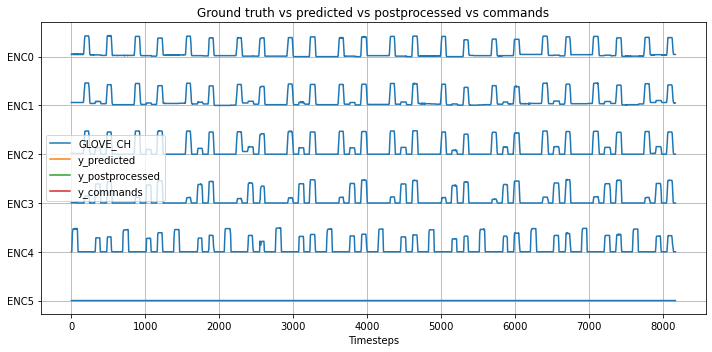

In [25]:
fig = plt.figure(figsize=(10, 5))

lines = []
labels = []

plots = plt.plot(df_sim[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 200, c='C0')
lines += [plots[0]]
labels += ['GLOVE_CH']

plots = plt.plot(y_dct['y_predicted'] - np.arange(len(GLOVE_CH)) * 200, c='C1')
lines += [plots[0]]
labels += ['y_predicted']

plots = plt.plot(y_dct['y_postprocessed'] - np.arange(len(GLOVE_CH)) * 200, c='C2')
lines += [plots[0]]
labels += ['y_postprocessed']

plots = plt.plot(y_dct['y_commands'] - np.arange(len(GLOVE_CH)) * 200, c='C3')
lines += [plots[0]]
labels += ['y_commands']

plt.title('Ground truth vs predicted vs postprocessed vs commands')
plt.yticks(-np.arange(len(GLOVE_CH)) * 200, GLOVE_CH)
plt.legend(lines, labels)
plt.grid()
plt.xlabel('Timesteps')

plt.tight_layout()

### Online (prosthesis or virtual hand)

In [26]:
TIMEOUT = 0.033
DEBUG = True

ser = None
# ser_port = None
ser_port = '/dev/cu.usbmodem3498365F31351'

if ser_port is not None:
    ser = serial.Serial(port=ser_port, timeout=2*TIMEOUT)
    ser.write('T1#\r\n'.encode('utf-8')) # T1 for Timestamp activate
    ser.write('M2#\r\n'.encode('utf-8')) # M2 for Mode == 2 = send samples
    ser.write('S2#\r\n'.encode('utf-8')) # SYNC to 2 for sanity check

    # flush buffers
    ser.reset_input_buffer()
    ser.read()
    
    i = 0;
    while(ser.in_waiting):
        print(f'Flushing buffers {i}: {ser.in_waiting}', end='    \r')
        ser.read_all()
        time.sleep(0.005)
        i+=1;
    ser.readline()
    ser.readline()
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_previous = None
while True:    
    
    # [Data reading]
    s = ser.readline()
    ts_start = time.time()
    
    try:
        sample = np.array(s.decode('UTF-8')\
                           .replace('\r\n', "")\
                           .split(' ')
                         ).astype(int)
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed)
    # [/Commands composition]
    
    # [Commands sending]
    pack, _ = drv_abs_one(ser, list(y_commands)); # + [0]
    # [/Commands sending]
    
    y_previous = y_postprocessed
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: iteration should increase monotonically, TIMEDIFF approximately 32-34 ms, CYCLETIME < TIMEOUT, WAITING should be == 0
        print(f'ITERATION:\t{i}\tTIMEDIFF:\t{(ts_start - ts_old)*1000: .0f}\tCYCLETIME:\t{ts_diff*1000:.0f}\tWAITING:\t{ser.in_waiting}')
        print('INPUT:\n', s)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
        print(pack)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 

NameError: name 'serial' is not defined